# Plotting temperature maps under Python

This snippet applies the basemap package plotting 

In [20]:
import datetime as dt
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

matplotlib.rcParams['figure.figsize'] = (30.0, 10.0)

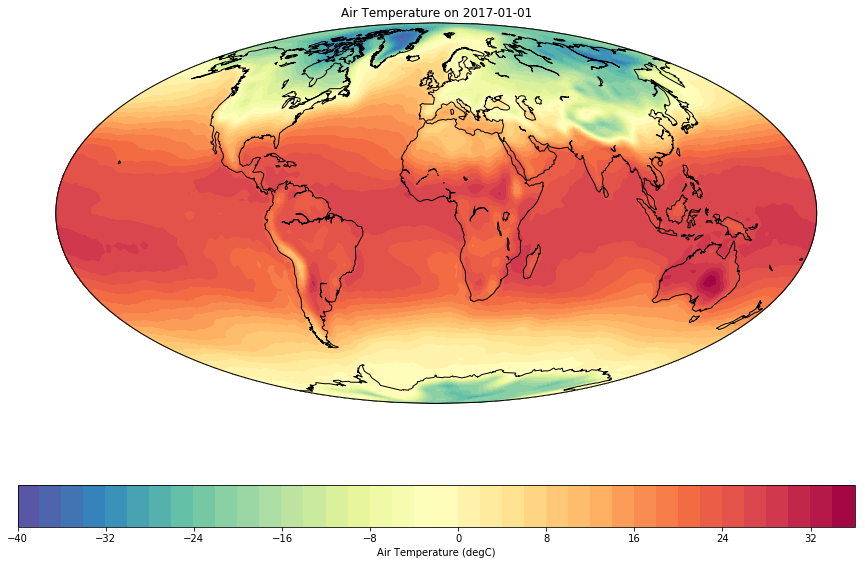

In [21]:
nc_file = "/media/desplein/store/projetoMeteo/old/nc/air_mon_mean.nc"
nc_fid = Dataset(nc_file, 'r')  # Dataset is the class behavior to open the file and create an instance of the ncCDF4 class
                             
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]
time = nc_fid.variables['time'][:]
air = nc_fid.variables['air'][:]  # shape is time, lat, lon as shown above

time_idx = 828  # some random day in 2012
# Python and the renalaysis are slightly off in time so this fixes that problem
offset = dt.timedelta(hours=48)
# List of all times in the file as datetime objects
dt_time = [dt.date(1800, 1, 1) + dt.timedelta(hours=t) for t in time]
cur_time = dt_time[time_idx]


# Plot of global temperature on our random day
#fig = plt.figure()
#fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# for other projections.
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# Make the plot continuous
air_cyclic, lons_cyclic = addcyclic(air[time_idx, :, :], lons)
# Shift the grid so lons go from -180 to 180 instead of 0 to 360.
air_cyclic, lons_cyclic = shiftgrid(180., air_cyclic, lons_cyclic, start=False)
# Create 2D lat/lon arrays for Basemap
lon2d, lat2d = np.meshgrid(lons_cyclic, lats)
# Transforms lat/lon into plotting coordinates for projection
x, y = m(lon2d, lat2d)
# Plot of air temperature with 11 contour intervals
cs = m.contourf(x, y, air_cyclic, 45, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label("%s (%s)" % (nc_fid.variables['air'].var_desc,nc_fid.variables['air'].units))
plt.title("%s on %s" % (nc_fid.variables['air'].var_desc, cur_time))
plt.show()